In [16]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
data = pd.read_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Makine Öğrenmesi\Advertising.csv",index_col=0)
data2=data.copy()
data2.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
print(data2.dtypes) # veri setindeki verilerin tiplerine bakalım
print(data2.isnull().sum()) # eksik değerimiz de bulunmuyor çok güzel. 


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [8]:
# bir multi linear regresyon modeli oluşturacağız ama bir bakalım 
# hangi değişkenler bir biri ile ilişkili sales üzerinden bakalım
print(data2.corr()["Sales"])
# Çıktıya göre newspaper çok ilişkili değil fakat radio ve tv iyi derecede ilişkili
# bir de grafiklerini çizdirerek bu ilişkileri kontrol edelim

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


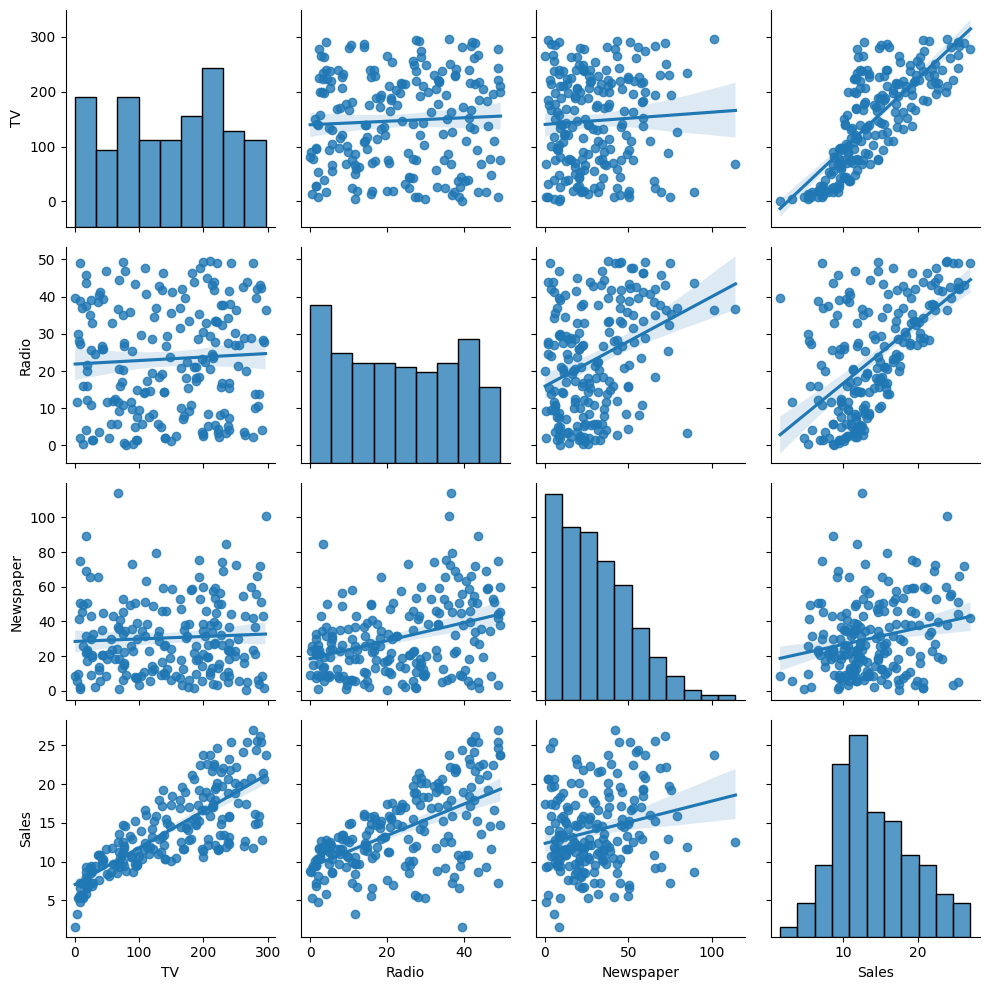

In [9]:
sns.pairplot(data2,kind="reg") # diagonal da dağılımlar var ilşikili yapıların regresyon plotunu çizer
plt.tight_layout()
plt.show()
# grafikte de görüleceği üzere tv - sales baya bir lineer gibi radio da da kısmen öyle iken 
# newspaper malesef çok da lineer değil nil nehrini geçen musa gibi görünüyor.

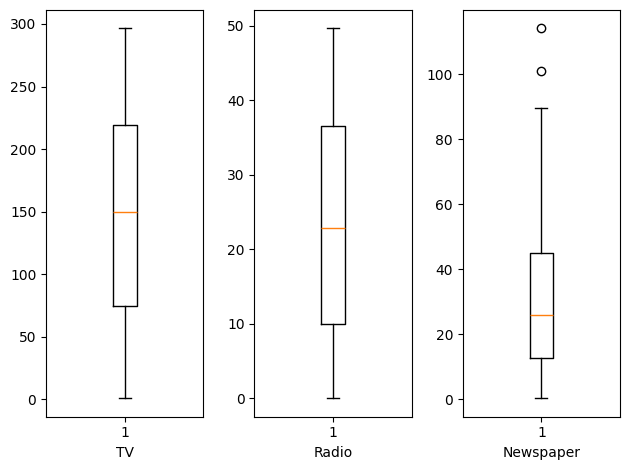

In [11]:
# aykırı gözlemleri kontrol edelim 
fig, ax = plt.subplots(1,3)
ax[0].boxplot(data2["TV"])
ax[0].set_xlabel("TV")
ax[1].boxplot(data2["Radio"])
ax[1].set_xlabel("Radio")
ax[2].boxplot(data2["Newspaper"])
ax[2].set_xlabel("Newspaper")
plt.tight_layout()
plt.show()
# SADECE Newspaperde aykırı değer varmış 

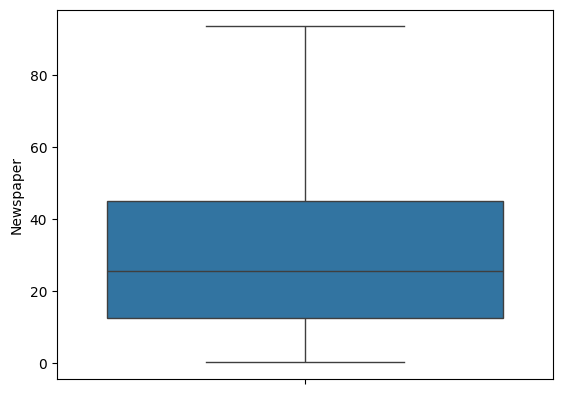

In [14]:
# aykırı değer az olduğu için hem hatırlamış oluruz yapalım 
Q1 = data2["Newspaper"].quantile(0.25)
Q3 = data2["Newspaper"].quantile(0.75)
IQR = Q3 - Q1
ustSınır = Q3 + 1.5*IQR
aykırı = data2["Newspaper"] > ustSınır
data2.loc[aykırı,"Newspaper"] = ustSınır
sns.boxplot(data2["Newspaper"])
plt.show()
# artık aykırı değerimiz yok. 


[0.04538404 0.18219606] 3.049075744582561


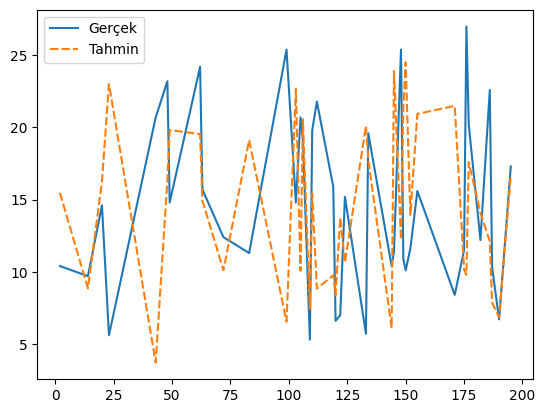

In [19]:
# Şimdi modeli kurmak için verilerimizi bölelim
y = data2["Sales"]
X = data2[["TV","Radio"]] # Newspaper i almadım değişken dışlama yapıyoruz çünkü zaten etkisi yok gibi

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# artık modelimizi oluşturabiliriz 
lr = LinearRegression().fit(X_train,y_train)
print(lr.coef_,lr.intercept_)
# artık 2 tane coef dönüyor. Dikkat edersek işte bunun nedeni çoklu doğrusal yapı
# yapımız artık B0 + B1*X1 + B2*X2 şeklinde 
# şimdi elimizdeki test verileri ile beraber bir tahmin yaptıralım 
tahmin = lr.predict(X_test)
y_test = y_test.sort_index() # sıralı gözükmesi açısından sıralayalım ki karmaşık olmasın
comp = pd.DataFrame({"Gerçek":y_test,"Tahmin":tahmin})
sns.lineplot(comp)
plt.show()
# evet burada verimizin azlığı modelin basitliği vs. den dolayı çok iyi bir sonuç alamamışız gibi
